In [349]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
from scipy import special

import math

import sys
sys.setrecursionlimit(10000)

D = Decimal


## Izracun $f(x)$ in $g(x)$


### Kaj sm naredu

1. Prvo kot prvo, verjetno je bols zmnozit sele nakonc z 1/3. -> PREVER, mogoce pa ne
2. Poisc f_k z rekurzijo, brez fakultet ker te cist zjebe numericno. To nardis z $f_{k+1} = GOODNOTES$


In [350]:
getcontext().prec = 100

alpha = D(0.355028053887817239)
beta = D(0.258819403792806798)

In [351]:
alpha

Decimal('0.355028053887817218736699942382983863353729248046875')

In [352]:
# x and sum have to be Decimal dtype
def A_B_i(x, max_sum_steps, min_precision, returnB=False, returnA=False, relativeErr=False):
    x = D(float(x))
    
    precision = D(10)**(-min_precision)

    sum_A_i = D(0)
    sum_B_i = D(0)
    k = D(1)
    # pri k = 0 je 1
    f_k = D(1)
    g_k = D(x)

    sum_A_i, sum_B_i, delta_sum_A_i, delta_sum_B_i = [D(0)]*4

    while k < max_sum_steps:
        delta_sum_A_i = alpha * f_k - beta * g_k
        delta_sum_B_i = D(3).sqrt() * (alpha*f_k + beta*g_k)

        if relativeErr:
            try:
                if D(delta_sum_A_i.__abs__() / sum_A_i).compare(precision) < D(1) and D(delta_sum_B_i.__abs__() / sum_B_i).__abs__().compare(precision) < D(1):
                    break
            except:
                max_sum_steps = D(200)
        else:
            if delta_sum_A_i.__abs__().compare(precision) < D(1) and delta_sum_B_i.__abs__().compare(precision) < D(1):
                break

        sum_A_i += delta_sum_A_i
        sum_B_i += delta_sum_B_i

        f_k *= (x**3 * (D(1) - D(2) / D(3) / k)) / (D(3)*k-D(1)) / (D(3)*k - D(2))
        g_k *= (x**3 * (D(1) - D(1) / D(3) / k)) / (D(3)*k+D(1)) / (D(3)*k - D(1))

        k += D(1)
    
    # print(k, delta_sum_A_i, precision, delta_sum_A_i.compare(precision))
    # print(k, delta_sum_B_i, precision, delta_sum_A_i.compare(precision))
    print(k, delta_sum_B_i/sum_B_i)

    if returnB:
        return sum_B_i, delta_sum_B_i
    elif returnA:
        return sum_A_i, delta_sum_A_i

    return sum_A_i,  sum_B_i, k



A_B_i = np.vectorize(A_B_i)


In [353]:
A_B_i(D(0),D(1000), 10)

2 0E-81
2 0E-81


(array(Decimal('0.3550280538878172187366999424'), dtype=object),
 array(Decimal('0.6149266274460006996034144892'), dtype=object),
 array(Decimal('2'), dtype=object))

201 5.644553175439579764723190714E-109
201 5.644553175439579764723190714E-109
200 -5.889469114341946628096219982E-108
200 -6.424119529224965884998908495E-108
200 -1.142525065424951197320617257E-108
199 6.209459869651201996428706088E-108
199 3.388551078661863586640324418E-108
199 -3.261830388680254396428338669E-108
198 -3.443002441124890633910780545E-107
198 -5.938719155457630920910860222E-108
198 4.752306300142622549701311442E-108
197 -1.899787507043630735972886332E-107
197 -1.043251907834637579133187269E-107
197 9.764803042743844361901435152E-108
197 3.392095364128818776307112197E-108
196 1.092757730622672514738754037E-106
196 1.254027088572709780539162484E-106
196 -1.829681217386000974676635648E-107
195 -2.055161276083836401412596968E-106
195 2.702912506602853879605860592E-107
195 3.102090543704663102468745208E-107
194 2.582224271267112697047590214E-106
194 -9.097376974171039988541870693E-107
194 -7.093131966777744051598298234E-107
194 7.759323241703993540283504386E-107
193 -9.592242

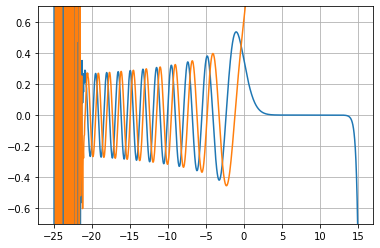

In [354]:
x = np.linspace(-25,15,1000,dtype=Decimal)

# here A_i and B_i are tuples (values, abs_error)
A_i, B_i, k = A_B_i(x, D(100000), 100)

plt.plot(x, A_i)
plt.plot(x, B_i)

plt.ylim([-0.7,0.7])

plt.grid()
plt.show()

# # print(k)


Asimptotska

Ideje:
- sinus dobimo najbols z x = x % (2 $\pi$)

In [355]:
def primitive_u_s(s):
    return special.gamma(3*s + 1/2) / (52**s * special.factorial(s) * special.gamma(s+1/2))

In [356]:
def memoize(func):
    cache = dict()

    def memoized_func(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return memoized_func

In [357]:
def u_s(s):
    if s == 0:
        return 1
    
    return u_s(s-1) * (D(s)-D(5)/D(6)) * (D(1) - D(1) / D(6) / D(s))

u_s = memoize(u_s)

Sam neka primerjava med u_s in primitivno implementacijo

In [358]:
u_s(2), primitive_u_s(2)

(Decimal('0.1485339506172839506172839507'), 0.040044840976331354)

Zdej pa gremo na funkcije

In [359]:
def L(x, max_steps):
    sum = 0
    s = 0
    while s < max_steps:
        delta_sum = u_s(s) / D(x).__pow__(D(s))
        sum += delta_sum
        s += 1
    return sum

def min_plus_k(k):
    if k % 2 == 0:
        return 1
    return -1


def P(x, max_steps):
    sum = 0
    s = 0
    while s < max_steps:
        delta_sum = min_plus_k(s) * u_s(2*s+1) / D(x).__pow__(D(2*s+1))
        sum += delta_sum
        s += 1
    return sum


def Q(x, max_steps):
    sum = 0
    s = 0
    while s < max_steps:
        delta_sum = min_plus_k(s) * u_s(2*s) / D(x).__pow__(D(2*s))
        sum += delta_sum
        s += 1
    return sum

def A_i_big_x(x, maxSteps = 1000):
    ksi = D(2)/D(3) * D(x).__abs__().__pow__(D(1.5))
    steps = 5
    Ai = D(0)
    # new_Ai = D(0)
    previousDelta = D('inf')

    while steps < maxSteps:
        new_Ai = (D(-ksi).exp())/(D(2) * D(math.pi).sqrt()
                         * D(x).__pow__(D(0.25))) * L(-ksi, steps)

        new_delta = D(new_Ai - Ai).__abs__()

        if new_delta > previousDelta:
            break

        previousDelta = new_delta
        Ai = new_Ai

        steps += 1

    # print(steps, new_delta/new_Ai)
    # new delta is maximum precision kinda
    return Ai, new_delta


def B_i_big_x(x, maxSteps=1000):
    ksi = D(2)/D(3) * D(x).__abs__().__pow__(D(1.5))
    steps = 5
    Bi = D(0)
    # new_Ai = D(0)
    previousDelta = D('inf')

    while steps < maxSteps:
        new_Bi = (D(ksi).exp())/(D(math.pi).sqrt() * D(x).__pow__(D(0.25))) * L(ksi, steps)

        new_delta = D(new_Bi - Bi).__abs__()

        if new_delta > previousDelta:
            break

        previousDelta = new_delta
        Bi = new_Bi

        steps += 1

    # print(steps, new_delta/new_Bi)
    return Bi, new_delta


A_i_big_x_vec = np.vectorize(A_i_big_x)
B_i_big_x_vec = np.vectorize(B_i_big_x)


In [360]:
# L(0.5, 12)
# P(0.5, 50)
# min_plus_k(2)
# Q(0.5, 100)

In [361]:
def relative_diff(t):
    return D((A_B_i(D(t), D(1000), 50)[0] - A_i_big_x(t)[0])/A_i_big_x(t)[0]).__abs__()

relative_diff = np.vectorize(relative_diff)

37 1.305346472327632808194884661E-54
37 1.305346472327632808194884661E-54
37 1.305346472327632808194884661E-54
37 1.305346472327632808194884661E-54
37 4.597737715703426642653262209E-54
37 4.597737715703426642653262209E-54
37 1.591370009989208847163148066E-53
37 1.591370009989208847163148066E-53
37 5.414865220494206663686782046E-53
37 5.414865220494206663686782046E-53
38 1.098050124794632782339183509E-54
38 1.098050124794632782339183509E-54
38 3.747042658494991281524204130E-54
38 3.747042658494991281524204130E-54
38 1.257956491792811686732341661E-53
38 1.257956491792811686732341661E-53
38 4.156367717991125739785475869E-53
38 4.156367717991125739785475869E-53
39 8.940409598377410034976185631E-55
39 8.940409598377410034976185631E-55
39 2.963833500158410032761035417E-54
39 2.963833500158410032761035417E-54
39 9.676189532206900829684805030E-54
39 9.676189532206900829684805030E-54
39 3.112095897056610754932303498E-53
39 3.112095897056610754932303498E-53
40 7.082475862645259546339321432E-55
4

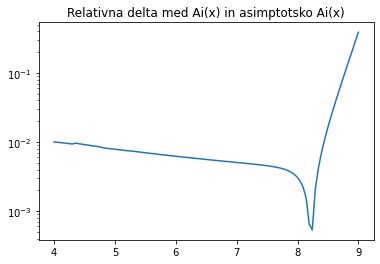

In [362]:
# t = 7
t = np.linspace(4,9,100)

y = relative_diff(t)

# (A_B_i(D(t), D(1000), 10)[1] - B_i_big_x(t)) / B_i_big_x(t)
# (A_B_i(D(t), D(1000), 50)[0] - A_i_big_x(t))/A_i_big_x(t)

plt.title('Relativna delta med Ai(x) in asimptotsko Ai(x)')

plt.plot(t,y)
plt.yscale('log')
# plt.


Zdej gremo se za negativne k mamo use herlper functione

In [363]:
def Ai_negativni_x(x, maxSteps=1000):
    ksi = D(2)/D(3) * D(x).__abs__().__pow__(D(1.5))

    ksi_reduced = ksi % (D(2*math.pi))
    steps = 5
    Ai = D(0)
    # new_Ai = D(0)
    previousDelta = D('inf')

    while steps < maxSteps:
        new_Ai = (1)/(D(math.pi).sqrt() * D(-x).__pow__(D(0.25))) * (D(math.sin(ksi_reduced + D(math.pi / 4)))
                                                                     * Q(ksi, steps) + D(math.cos(ksi_reduced + D(math.pi / 4))) * P(ksi, steps))

        new_delta = D(new_Ai - Ai).__abs__()

        if new_delta > previousDelta:
            break

        previousDelta = new_delta
        Ai = new_Ai

        steps += 1

    print(steps, new_delta)
    return Ai, new_delta


def Bi_negativni_x(x, maxSteps=1000):
    ksi = D(2)/D(3) * D(x).__abs__().__pow__(D(1.5))

    ksi_reduced = ksi % (D(2*math.pi))
    steps = 5
    Bi = D(0)
    # new_Ai = D(0)
    previousDelta = D('inf')

    while steps < maxSteps:
        new_Bi = (1)/(D(math.pi).sqrt() * D(-x).__pow__(D(0.25))) * (D(-math.sin(ksi_reduced + D(math.pi / 4)))
                                                                     * P(ksi, steps) + D(math.cos(ksi_reduced + D(math.pi / 4))) * Q(ksi, steps))

        new_delta = D(new_Bi - Bi).__abs__()

        if new_delta > previousDelta:
            break

        previousDelta = new_delta
        Bi = new_Bi

        steps += 1

    print(steps, new_delta)
    return Bi, new_delta


Ai_negativni_x = np.vectorize(Ai_negativni_x)
Bi_negativni_x = np.vectorize(Bi_negativni_x)


159 -7.213674979124596134483455214E-30
159 -7.213674979124596134483455214E-30
159 4.634176019215866663218153458E-30
158 -1.288331327795233791188430362E-29
158 6.853122093443681413533214549E-30
157 -2.013791364533195658163771673E-29
157 -1.652391810521518416405982622E-29
157 -1.329567558189959316787059931E-29
156 -1.066178098435083267541828907E-27
156 3.975113835881733430513997854E-29
155 1.578668651297282184314816307E-27
155 1.275310963048483258555299956E-28
155 9.109484400140081614418356601E-29
154 2.031998224560800705583021456E-28
154 2.376102553057047274952778404E-28
153 -5.367506835933231778589386946E-28
153 -3.455907079737412535406363262E-27
153 -4.900218986326921751013141623E-28
152 -1.577875825568412021020320215E-27
152 2.796871687894526164835265456E-27
152 -5.443607614424783435566630491E-28
151 2.141139575590785722101950014E-27
151 -2.291240404760877304879263844E-27
150 -3.118864230179517639927171035E-26
150 1.223038976406841321550830844E-26
150 9.675878097184713290021423906E-2

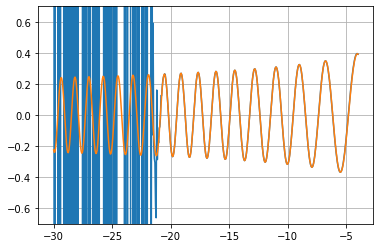

In [364]:
t = np.linspace(-30, -4, 500)

A_i, B_i, k = A_B_i(t, D(100000), 10)

# Ai_asimptotika = Ai_negativni_x(t)
Bi_asimptotika, Bi_errors = Bi_negativni_x(t)

# plt.plot(t, A_i)
plt.plot(t, B_i)
# plt.plot(t, Ai_asimptotika)
plt.plot(t, Bi_asimptotika)

# plt.plot(t, np.abs(B_i - Bi_asimptotika))


plt.ylim([-0.7, 0.7])

plt.grid()
plt.show()



### Mal prikaz errorjev

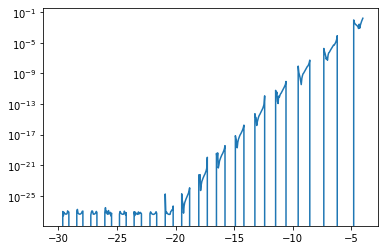

In [365]:
plt.plot(t, Bi_errors/Bi_asimptotika)
plt.yscale('log')

plt.show()

7 5.272042971186131674072698616E-12
7 5.272042971186131674072698616E-12
8 4.330368527186318468638328987E-13
8 8.551704550517028738977192176E-12
9 7.713768298673411417960305199E-13
9 1.005915967631333426604598750E-11
10 1.025294258817351959221452377E-12
10 1.018754304833811086517328653E-11
11 1.172015550688661431380710417E-12
11 9.595297888093554022311159541E-12
12 1.236191988957149379585745514E-12
13 1.706794603036094288414755343E-13
13 1.250351342030041806461157771E-12
14 1.896382947439190868690361232E-13
14 1.239839933541383417480338653E-12
15 2.050871320671638146710256067E-13
15 1.221058523576170719224628464E-12
16 2.187714929834092204078196539E-13
17 4.090792525567042957137952322E-14
17 2.321209087063343629397617942E-13
18 4.648640984287637292594968761E-14
19 9.655951682575906155680492044E-15
19 5.256573263611613423066770740E-14
20 1.159265995427354950794640138E-14
20 5.938015348150192682870693565E-14
21 1.384946232475559445028202744E-14
22 3.324324916650795049303592260E-15
23 8.20

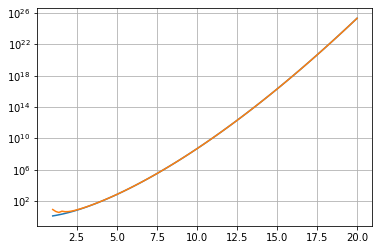

In [366]:
t = np.linspace(1, 20, 100)

A_i, B_i, k = A_B_i(t, D(100000), 10)

# Ai_asimptotika = Ai_negativni_x(t)
Bi_asimptotika, Bi_errors = B_i_big_x_vec(t)

# plt.plot(t, A_i)
plt.plot(t, B_i)
# plt.plot(t, Ai_asimptotika)
plt.plot(t, Bi_asimptotika)

# plt.plot(t, np.abs(B_i - Bi_asimptotika))


# plt.ylim([-0.7, 0.7])

plt.yscale('log')

plt.grid()
plt.show()


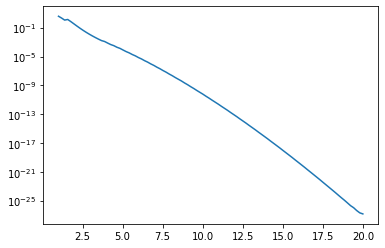

In [367]:
plt.plot(t, Bi_errors/Bi_asimptotika)
# plt.plot(t, Bi_errors)

plt.yscale('log')


## Kje je najbols switchat med obicno in asimptotsko?

In [368]:
min_x_Bi = -15
max_x_Bi = 20


def final_Bi(x):
    x = D(x)
    if x < min_x_Bi:
        return Bi_negativni_x(x)
    if x > max_x_Bi:
        return B_i_big_x(x)

    return A_B_i(x, D(100000), 15, returnB=True)


final_Bi = memoize(final_Bi)


In [369]:
min_x_Ai = -15
max_x_Ai = 8.23


def final_Ai(x, relativeErr=False):
    x = D(x)
    if x < min_x_Ai:
        return Ai_negativni_x(x)
    if x > max_x_Ai:
        return A_i_big_x(x)

    return A_B_i(x, D(100000), 25, returnA=True)


final_Ai = memoize(final_Ai)


def getVals(x, func):
    return func(x)[0]


def getErrs(x, func, relativeErr=False):
    return np.abs(func(x)[1])


78 2E-28
78 2E-28
76 1E-28
76 1E-28
76 5E-29
76 5E-29
74 2E-29
74 2E-29
75 2E-29
75 2E-29
17 3E-29
17 3E-29
76 1E-28
76 1E-28
75 1E-28
75 1E-28
77 1E-28
77 1E-28
75 1E-28
75 1E-28
74 1E-28
74 1E-28
73 1E-28
73 1E-28
73 1E-28
73 1E-28
72 1E-28
72 1E-28
72 1E-28
72 1E-28
67 3E-29
67 3E-29
67 3E-30
67 3E-30
69 2E-29
69 2E-29
71 1E-28
71 1E-28
71 1E-28
71 1E-28
69 1E-28
69 1E-28
71 1E-28
71 1E-28
70 1E-28
70 1E-28
68 1E-28
68 1E-28
68 1E-28
68 1E-28
68 1E-28
68 1E-28
67 1E-28
67 1E-28
67 1E-28
67 1E-28
66 5E-29
66 5E-29
60 3E-31
60 3E-31
66 8E-29
66 8E-29
65 1E-28
65 1E-28
66 1E-28
66 1E-28
67 1E-28
67 1E-28
63 1E-28
63 1E-28
65 1E-28
65 1E-28
64 1E-28
64 1E-28
64 2E-28
64 2E-28
62 1E-28
62 1E-28
60 1E-28
60 1E-28
61 1E-28
61 1E-28
59 2E-29
59 2E-29
56 1E-30
56 1E-30
59 3E-29
59 3E-29
20 1E-28
20 1E-28
61 1E-28
61 1E-28
57 1E-28
57 1E-28
58 1E-28
58 1E-28
60 1E-28
60 1E-28
59 2E-28
59 2E-28
58 1E-28
58 1E-28
56 1E-28
56 1E-28
54 1E-28
54 1E-28
56 1E-28
56 1E-28
53 3E-29
53 3E-29
53 1E-29
5

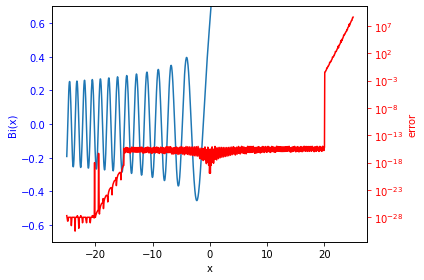

In [370]:
fig, ax1 = plt.subplots()
x = np.linspace(-25, 25, 1000, dtype=Decimal)
y = np.vectorize(getVals)(x, final_Bi)
y_err = np.vectorize(getErrs)(x, final_Bi)

ax1.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylim([-0.7, 0.7])

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Bi(x)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y_err, 'r-')
ax2.set_ylabel('error', color='r')
ax2.set_yscale('log')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


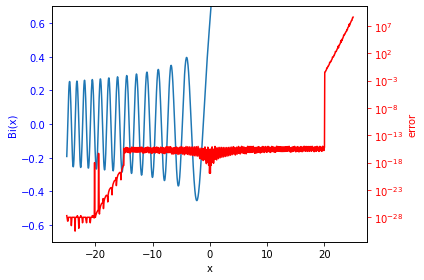

In [371]:
fig, ax1 = plt.subplots()
x = np.linspace(-25, 25, 1000, dtype=Decimal)
y = np.vectorize(getVals)(x, final_Bi)
y_err = np.vectorize(getErrs)(x, final_Bi)

ax1.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylim([-0.7, 0.7])

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Bi(x)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y_err, 'r-')
ax2.set_ylabel('error', color='r')
ax2.set_yscale('log')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


76 1E-28
76 1E-28
74 3E-29
74 3E-29
74 1E-29
74 1E-29
74 2E-29
74 2E-29
74 1E-28
74 1E-28
76 1E-28
76 1E-28
78 3E-28
78 3E-28
75 1E-28
75 1E-28
73 1E-28
73 1E-28
72 1E-28
72 1E-28
71 1E-28
71 1E-28
72 1E-28
72 1E-28
71 5E-29
71 5E-29
68 1E-29
68 1E-29
68 3E-29
68 3E-29
71 1E-28
71 1E-28
72 2E-28
72 2E-28
71 1E-28
71 1E-28
69 1E-28
69 1E-28
67 1E-28
67 1E-28
68 1E-28
68 1E-28
66 1E-28
66 1E-28
65 3E-29
65 3E-29
61 1E-29
61 1E-29
64 2E-29
64 2E-29
64 1E-28
64 1E-28
66 1E-28
66 1E-28
66 1E-28
66 1E-28
64 1E-28
64 1E-28
63 1E-28
63 1E-28
63 1E-28
63 1E-28
61 1E-28
61 1E-28
62 1E-28
62 1E-28
60 3E-29
60 3E-29
59 1E-29
59 1E-29
59 2E-29
59 2E-29
60 1E-28
60 1E-28
61 1E-28
61 1E-28
60 1E-28
60 1E-28
59 1E-28
59 1E-28
59 1E-28
59 1E-28
57 1E-28
57 1E-28
57 1E-28
57 1E-28
57 1E-28
57 1E-28
55 5E-29
55 5E-29
54 3E-29
54 3E-29
56 1E-28
56 1E-28
56 1E-28
56 1E-28
58 2E-28
58 2E-28
55 1E-28
55 1E-28
53 1E-28
53 1E-28
53 1E-28
53 1E-28
52 1E-28
52 1E-28
49 1E-28
49 1E-28
49 2E-29
49 2E-29
48 3E-29
4

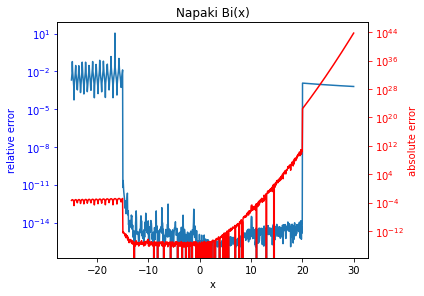

In [372]:
fig, ax1 = plt.subplots()
x = np.linspace(-25, 30, 1000)
y = np.vectorize(getVals)(x, final_Bi)

ai_real, aip, bi_real, bip = special.airy(x)
# y_err = np.vectorize(getErrs)(x, final_Ai)

y = [np.float64(i) for i in y]
y_err = np.abs(y-bi_real)

# ax1.plot(x, y)
ax1.set_xlabel('x')
# ax1.set_ylim([-0.7, 0.7])

# Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_ylabel('Bi(x)', color='b')
# ax1.tick_params('y', colors='b')

ax1.plot(x, np.abs(y_err/bi_real))
ax1.set_ylabel('relative error', color='b')
ax1.tick_params('y', colors='b')
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(x, y_err, 'r-')
ax2.set_ylabel('absolute error', color='r')
ax2.set_yscale('log')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Napaki Bi(x)')
plt.show()


Se za Ai

77 1E-28
77 1E-28
77 1E-28
77 1E-28
78 1E-28
78 1E-28
77 1E-28
77 1E-28
76 1E-28
76 1E-28
76 1E-28
76 1E-28
75 1E-28
75 1E-28
72 1E-28
72 1E-28
74 1E-28
74 1E-28
72 3E-29
72 3E-29
70 1E-29
70 1E-29
72 3E-29
72 3E-29
72 1E-28
72 1E-28
74 2E-28
74 2E-28
75 1E-28
75 1E-28
73 1E-28
73 1E-28
72 1E-28
72 1E-28
71 1E-28
71 1E-28
69 1E-28
69 1E-28
69 1E-28
69 1E-28
69 1E-28
69 1E-28
68 2E-29
68 2E-29
68 2E-29
68 2E-29
67 2E-29
67 2E-29
67 3E-29
67 3E-29
68 1E-28
68 1E-28
69 1E-28
69 1E-28
70 1E-28
70 1E-28
68 1E-28
68 1E-28
65 1E-28
65 1E-28
65 1E-28
65 1E-28
66 2E-28
66 2E-28
65 1E-28
65 1E-28
65 1E-28
65 1E-28
63 3E-29
63 3E-29
61 3E-29
61 3E-29
62 3E-29
62 3E-29
61 3E-29
61 3E-29
63 1E-28
63 1E-28
64 1E-28
64 1E-28
62 1E-28
62 1E-28
60 1E-28
60 1E-28
62 1E-28
62 1E-28
60 1E-28
60 1E-28
59 1E-28
59 1E-28
60 1E-28
60 1E-28
59 1E-28
59 1E-28
58 5E-29
58 5E-29
57 3E-29
57 3E-29
56 1E-29
56 1E-29
57 3E-29
57 3E-29
57 1E-28
57 1E-28
20 1E-28
20 1E-28
55 1E-28
55 1E-28
56 1E-28
56 1E-28
56 1E-28
5

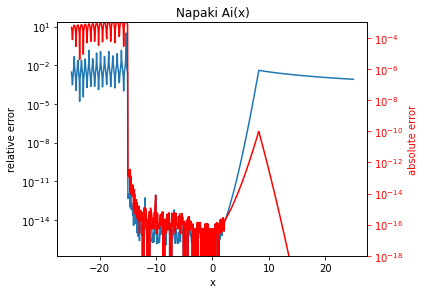

In [373]:
fig, ax1 = plt.subplots()
x = np.linspace(-25, 25, 1000)
y = np.vectorize(getVals)(x, final_Ai)

ai_real, aip, bi_real, bip = special.airy(x)
# y_err = np.vectorize(getErrs)(x, final_Ai)

y = [np.float64(i) for i in y]
y_err = np.abs(y-ai_real)

# ax1.plot(x, y)
ax1.set_xlabel('x')
# ax1.set_ylim([-0.7, 0.7])

# Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_ylabel('Bi(x)', color='b')
# ax1.tick_params('y', colors='b')

ax1.plot(x, np.abs(y_err/ai_real))
ax1.set_ylabel('relative error')
ax1.tick_params('y')
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(x, y_err, 'r-')
ax2.set_ylabel('absolute error', color='r')
ax2.set_yscale('log')
ax2.set_ylim([1e-18, 1e-3])
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Napaki Ai(x)')
plt.show()


Iskanje nicel